<font size="+5">#07 | The Python Resolver Discipline</font>


<div class="alert alert-warning">
  <ul>
    <li>
      <b>Python</b> + <b>Data Science</b> Tutorials in ↓
      <ul>
        <li>
          <a href="https://www.youtube.com/c/PythonResolver?sub_confirmation=1"
            >YouTube</a
          >
        </li>
        <li>
          <a href="https://blog.pythonresolver.com/">Blog</a>
        </li>
        <li>
          <a href="https://github.com/jsulopz/00-python-resolver-discipline">GitHub</a>
        </li>
      </ul>
    </li>
    <li>
      Author: <a href="https://twitter.com/jsulopz"><b>@jsulopz</b></a>
    </li>
  </ul>
</div>

<a href="https://colab.research.google.com/github/jsulopz/resolving-python-data-science/blob/main/07_The%20Python%20Resolver%20Discipline/07_google-method_session.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# The Starting *Thing*

In [102]:
import pandas as pd #!

df = pd.read_csv('https://raw.githubusercontent.com/jsulopz/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


# Look for the `function()` to Create the Data Visualization

- Apply the [Python Resolver Discipline](https://github.com/jsulopz/python-resolver-discipline/blob/main/01_Code%20of%20Discipline/01_Sketch%20the%20Result.md)
- The function `area()` from `express` module within `plotly` library
- Where I specify:
    - The `Date` column in the x-axis
    - The `Volume` column in the `y-axis`
    - And `df` as the `DataFrame` where to look for these columns

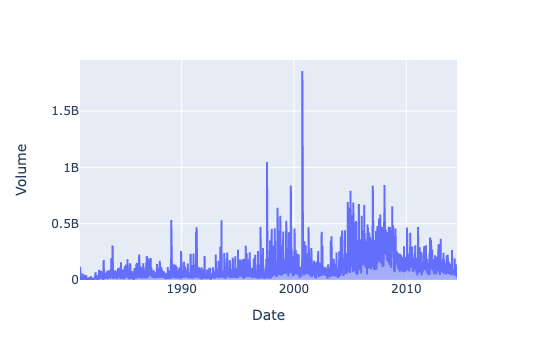

In [103]:
import plotly.express as px

px.area(x='Date', y='Volume', data_frame=df)

- Zoom in and see the Timestamp
- [ ] Is it Monthly?

# Data Points Don't Appear on a Monthly Basis

- Apply the [Python Resolver Discipline](https://github.com/jsulopz/python-resolver-discipline/blob/main/01_Code%20of%20Discipline/01_Sketch%20the%20Result.md)

## Understand the Problem

- Compute the Total `Volume` per Month
    - `Volume` is a numerical column
    - Month is implicitly said in `Date` column

## The Starting *Thing*

In [104]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


## The Desired Result

## Work Out the Solution

**1. Extract the month-year for every row**

In [105]:
df.Date

0       2014-07-08
1       2014-07-07
2       2014-07-03
3       2014-07-02
4       2014-07-01
           ...    
8460    1980-12-18
8461    1980-12-17
8462    1980-12-16
8463    1980-12-15
8464    1980-12-12
Name: Date, Length: 8465, dtype: object

In [106]:
type(df.Date)

pandas.core.series.Series

In [107]:
df['StartDate'].dt.to_period('M')

KeyError: 'StartDate'

In [108]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [109]:
df['Date'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

In [110]:
df['Date'].dt

AttributeError: Can only use .dt accessor with datetimelike values

In [111]:
type(df['Date'])

pandas.core.series.Series

In [112]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [113]:
df["Date"] = pd.to_datetime(df["Date"])

In [114]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [115]:
df['Monthly'] = df['Date'].dt.to_period('M')

In [116]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Monthly
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07


**2. Aggregate the data to get the Volume per Month**

In [117]:
df.groupby('Monthly').sum()

,Open,High,Low,Close,Volume,Adj Close
Monthly,,,,,,
1980-12,396.26,397.38,395.76,395.76,336212800,6.15
1981-01,666.85,668.36,664.75,664.75,152247200,10.37
1981-02,503.12,504.87,501.75,501.75,80404800,7.81
1981-03,548.63,550.37,546.40,546.40,175179200,8.53
1981-04,573.02,574.73,571.77,571.77,134232000,8.89
...,...,...,...,...,...,...
2014-03,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75
2014-04,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21
2014-05,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23


In [118]:
res = df.groupby('Monthly')['Volume'].sum()

In [119]:
res

Monthly
1980-12     336212800
1981-01     152247200
1981-02      80404800
1981-03     175179200
1981-04     134232000
              ...    
2014-03    1250424700
2014-04    1608765200
2014-05    1433917100
2014-06    1206556300
2014-07     210918300
Freq: M, Name: Volume, Length: 404, dtype: int64

## Try Again

In [120]:
px.area(x='Monthly', y='Volume', data_frame=res)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Volume'] but received: Monthly

# Axis Data as a `Series` of the `DataFrame`

- Apply the [Python Resolver Discipline](https://github.com/jsulopz/python-resolver-discipline/blob/main/01_Code%20of%20Discipline/01_Sketch%20the%20Result.md)

## Understand the Problem

In [121]:
res.columns

AttributeError: 'Series' object has no attribute 'columns'

## The Starting *Thing*

In [57]:
res

Monthly
1980-12     336212800
1981-01     152247200
1981-02      80404800
1981-03     175179200
1981-04     134232000
              ...    
2014-03    1250424700
2014-04    1608765200
2014-05    1433917100
2014-06    1206556300
2014-07     210918300
Freq: M, Name: Volume, Length: 404, dtype: int64

In [58]:
type(res)

pandas.core.series.Series

## The Desired Result

- We need to convert `res` (now a `Series`) to a `DataFrame` object
- Like the one below ↓

In [122]:
df.head() #!

,Date,Open,High,Low,Close,Volume,Adj Close,Monthly
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07


## Work Out the Solution

In [68]:
dfres = res.reset_index()

In [69]:
dfres

,Monthly,Volume
0,1980-12,336212800
1,1981-01,152247200
2,1981-02,80404800
3,1981-03,175179200
4,1981-04,134232000
...,...,...
399,2014-03,1250424700
400,2014-04,1608765200
401,2014-05,1433917100
402,2014-06,1206556300


## Try Again

In [70]:
px.area(x='Monthly', y='Volume', data_frame=dfres)

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

Figure({
    'data': [{'hovertemplate': 'Monthly=%{x}<br>Volume=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'stackgroup': '1',
              'type': 'scatter',
              'x': array([Period('1980-12', 'M'), Period('1981-01', 'M'), Period('1981-02', 'M'),
                          ..., Period('2014-05', 'M'), Period('2014-06', 'M'),
                          Period('2014-07', 'M')], dtype=object),
              'xaxis': 'x',
              'y': array([ 336212800,  152247200,   80404800, ..., 1433917100, 1206556300,
                           210918300]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': 

# Plotly doesn't understand the `Period`

- Apply the [Python Resolver Discipline](https://github.com/jsulopz/python-resolver-discipline/blob/main/01_Code%20of%20Discipline/01_Sketch%20the%20Result.md)

## Understand the Problem

In [71]:
type(dfres)

pandas.core.frame.DataFrame

In [72]:
dfres.dtypes

Monthly    period[M]
Volume         int64
dtype: object

In [73]:
df.Monthly.dtypes

period[M]

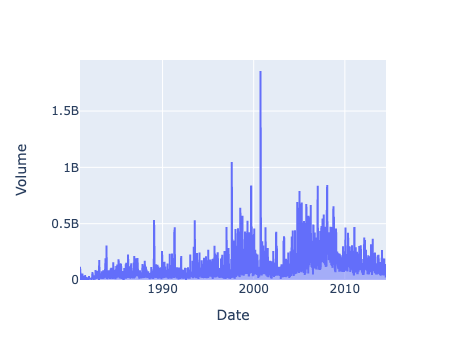

In [123]:
px.area(x='Date', y='Volume', data_frame=df)

In [124]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
Monthly           period[M]
dtype: object

## The Starting *Thing*

In [75]:
dfres

,Monthly,Volume
0,1980-12,336212800
1,1981-01,152247200
2,1981-02,80404800
3,1981-03,175179200
4,1981-04,134232000
...,...,...
399,2014-03,1250424700
400,2014-04,1608765200
401,2014-05,1433917100
402,2014-06,1206556300


## The Desired Result

Monthly ~ object | datetime

## Work Out the Solution

In [32]:
df.Monthly.to_timestamp()

TypeError: unsupported Type RangeIndex

In [33]:
df.Monthly.index

RangeIndex(start=0, stop=8465, step=1)

In [34]:
res.index

PeriodIndex(['1980-12', '1981-01', '1981-02', '1981-03', '1981-04', '1981-05',
             '1981-06', '1981-07', '1981-08', '1981-09',
             ...
             '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
             '2014-04', '2014-05', '2014-06', '2014-07'],
            dtype='period[M]', name='Monthly', length=404)

In [35]:
dfres = res.to_timestamp().reset_index()

In [36]:
dfres

,Monthly,Volume
0,1980-12-01,336212800
1,1981-01-01,152247200
2,1981-02-01,80404800
3,1981-03-01,175179200
4,1981-04-01,134232000
...,...,...
399,2014-03-01,1250424700
400,2014-04-01,1608765200
401,2014-05-01,1433917100
402,2014-06-01,1206556300


In [37]:
dfres.dtypes

Monthly    datetime64[ns]
Volume              int64
dtype: object

## Try Again

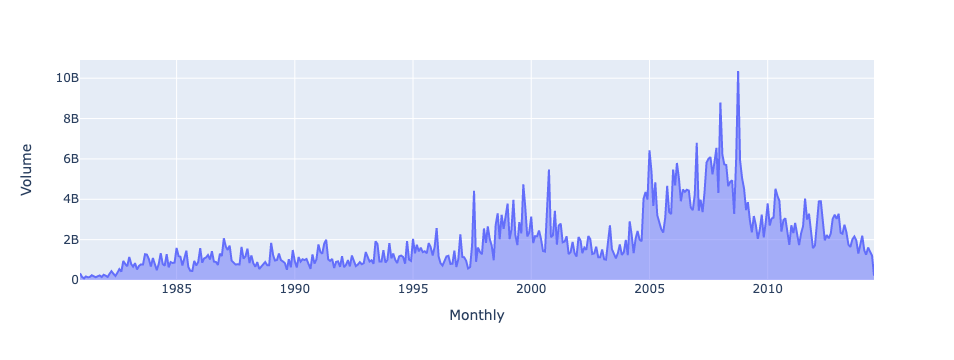

In [38]:
px.area(x='Monthly', y='Volume', data_frame=dfres)

# The Uncovered Solution

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/jsulopz/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [98]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [99]:
df.Date = pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [90]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Monthly
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07
...,...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12


In [100]:
df['Monthly'] = df['Date'].dt.to_period('M')
df

,Date,Open,High,Low,Close,Volume,Adj Close,Monthly
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07
...,...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12


In [94]:
res = df.groupby(by='Monthly').Volume.sum()
res

Monthly
1980-12     336212800
1981-01     152247200
1981-02      80404800
1981-03     175179200
1981-04     134232000
              ...    
2014-03    1250424700
2014-04    1608765200
2014-05    1433917100
2014-06    1206556300
2014-07     210918300
Freq: M, Name: Volume, Length: 404, dtype: int64

In [89]:
res = res.to_timestamp()
res

TypeError: unsupported Type DatetimeIndex

In [88]:
dfres = res.reset_index()
dfres

,Monthly,Volume
0,1980-12-01,336212800
1,1981-01-01,152247200
2,1981-02-01,80404800
3,1981-03-01,175179200
4,1981-04-01,134232000
...,...,...
399,2014-03-01,1250424700
400,2014-04-01,1608765200
401,2014-05-01,1433917100
402,2014-06-01,1206556300


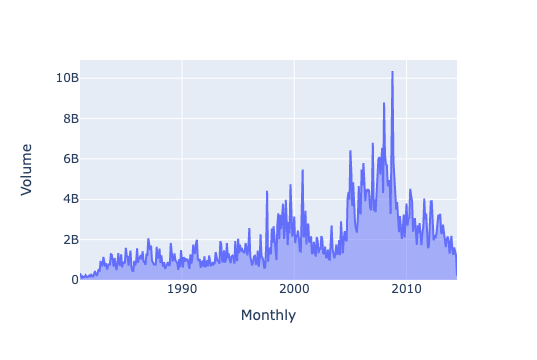

In [87]:
px.area(x='Monthly', y='Volume', data_frame=dfres)

# What Have We Learnt?

- How to get a correct diagnosis of the error?
- How to ask for solutions in Google applying the [Python Resolver Discipline](https://github.com/jsulopz/python-resolver-discipline)?
- How to break up the problem into pieces to finally reach the solution?

# Which Concepts Have We Learnt?

- Series
- Datetime
- Period
- Timestamp
- DataFrame
- `pandas.Series.reset_index()`
- Index